In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/home/vishal/Documents/datasets/sales_data_sample.csv', encoding='latin1')

# Select relevant features for clustering (e.g., 'SALES' and 'QUANTITYORDERED')
df_clustering = df[['SALES', 'QUANTITYORDERED']].dropna()

In [2]:
df_clustering

,SALES,QUANTITYORDERED
0,2871.00,30
1,2765.90,34
2,3884.34,41
3,3746.70,45
4,5205.27,49
...,...,...
2818,2244.40,20
2819,3978.51,29
2820,5417.57,43
2821,2116.16,34


In [3]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)

In [4]:
scaled_data

array([[-0.37082523, -0.52289086],
       [-0.42789707, -0.11220131],
       [ 0.17944282,  0.60650538],
       ...,
       [ 1.01202368,  0.81185016],
       [-0.78072155, -0.11220131],
       [-0.25763729,  1.2225397 ]])

In [5]:
sse=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=0)
    kmeans.fit_transform(scaled_data)
    sse.append(kmeans.inertia_)


In [6]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

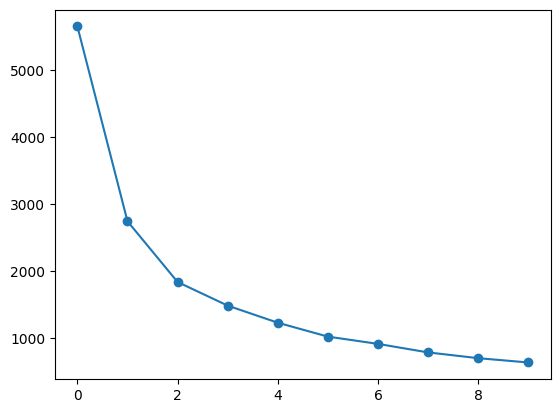

In [7]:
plt.plot(sse,marker='o')

In [8]:
optimal_K=10

In [9]:
kmeans=KMeans(n_clusters=optimal_K,random_state=42)

In [10]:
df_clustering['Cluster']=kmeans.fit_predict(scaled_data)

In [11]:
df_clustering

,SALES,QUANTITYORDERED,Cluster
0,2871.00,30,0
1,2765.90,34,8
2,3884.34,41,1
3,3746.70,45,4
4,5205.27,49,1
...,...,...,...
2818,2244.40,20,7
2819,3978.51,29,3
2820,5417.57,43,1
2821,2116.16,34,0


In [20]:
pd.set_option('display.max_rows', None)  
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
z= linkage(scaled_data, method='ward')


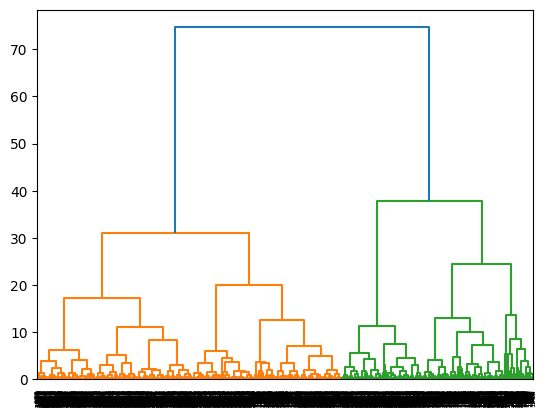

In [23]:
dendrogram(z)
plt.show()


In [22]:
plt.show()
